In [1]:
!pip install deepchem
import deepchem as dc
dc.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.1'

In [2]:
!pip install rdkit

In [3]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import io
from google.colab import files
import mols2grid

In [5]:
from google.colab import files
uploaded = files.upload()

Saving mutagenicity_curated_new.xlsx to mutagenicity_curated_new.xlsx


In [6]:
df2 = pd.read_excel('mutagenicity_curated_new.xlsx')
df2 = df2.rename(columns={"mut": "y", "smiles": "ids"})
df2

,num,y,ids,ROMol,morgan,w
0,0,1,COc1ccc(-c2nc(-c3ccccc3)c(-c3ccccc3)[nH]2)cc1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660
1,1,1,Cc1c(N=C=O)cccc1N=C=O,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660
2,2,0,CC1(Cn2ccnn2)C(C(=O)O)N2C(=O)CC2S1(=O)=O,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
3,3,0,C=CC(=O)OCCN(C)C,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
4,4,0,Clc1cc(Cl)c(Cl)cc1Cl,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
...,...,...,...,...,...,...
3994,4331,1,NC(=O)CC1CO1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660
3995,4333,0,CCCCCCCCCCCCOCCOCCOCCOCCOCCOCCOCCO,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
3996,4334,0,Nc1ccn(C2C=C(CO)C(O)C2O)c(=O)n1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
3997,4335,1,CCC(C)ON=O,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660


,num,y,ids,ROMol,morgan,w
0,0,1,COc1ccc(-c2nc(-c3ccccc3)c(-c3ccccc3)[nH]2)cc1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660
1,1,1,Cc1c(N=C=O)cccc1N=C=O,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660
2,2,0,CC1(Cn2ccnn2)C(C(=O)O)N2C(=O)CC2S1(=O)=O,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
3,3,0,C=CC(=O)OCCN(C)C,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
4,4,0,Clc1cc(Cl)c(Cl)cc1Cl,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
...,...,...,...,...,...,...
3994,4331,1,NC(=O)CC1CO1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660
3995,4333,0,CCCCCCCCCCCCOCCOCCOCCOCCOCCOCCOCCO,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
3996,4334,0,Nc1ccn(C2C=C(CO)C(O)C2O)c(=O)n1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.799578
3997,4335,1,CCC(C)ON=O,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.250660

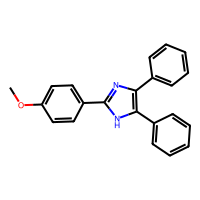
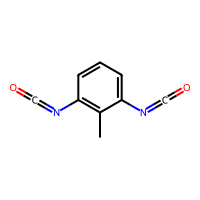
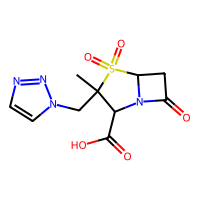
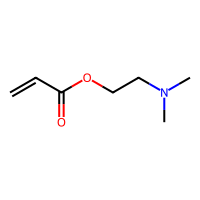
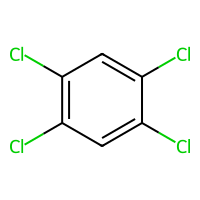
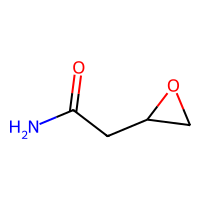
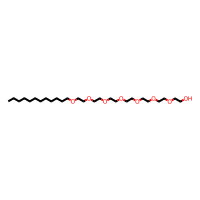
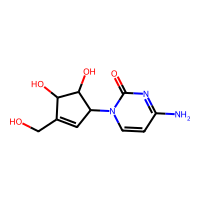
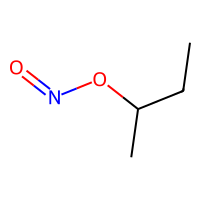
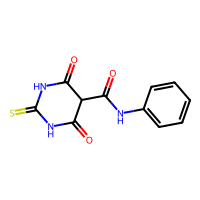

In [7]:
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol="ids")
df2

In [8]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

<ipython-input-8-f0dafa6ba427>:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  features.set_axis(list_X, axis=1,inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COc1ccc(-c2nc(-c3ccccc3)c(-c3ccccc3)[nH]2)cc1,1,2.250660
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cc1c(N=C=O)cccc1N=C=O,1,2.250660
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,CC1(Cn2ccnn2)C(C(=O)O)N2C(=O)CC2S1(=O)=O,0,1.799578
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C=CC(=O)OCCN(C)C,0,1.799578
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Clc1cc(Cl)c(Cl)cc1Cl,0,1.799578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NC(=O)CC1CO1,1,2.250660
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCCCCCCCCCCOCCOCCOCCOCCOCCOCCOCCO,0,1.799578
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Nc1ccn(C2C=C(CO)C(O)C2O)c(=O)n1,0,1.799578
3997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCC(C)ON=O,1,2.250660


In [9]:
# Convertig dataframe concat into NumpyDataset object (datasetnp)
datasetnp = dc.data.NumpyDataset.from_dataframe(df_featurized2)

# Creating a RandomSplitter object and splitting into just only train and valid datasets
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(datasetnp,frac_train = 0.8, frac_valid = 0.2, frac_test= 0.0)

In [10]:
n_tasks = 1
n_features = train_dataset.X.shape[1]

In [11]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [12]:
rf = RandomForestClassifier()
rf.fit(train_dataset.X,train_dataset.y.ravel())

RandomForestClassifier()

In [13]:
y_pred = rf.predict(valid_dataset.X)

In [14]:
accuracy = accuracy_score(valid_dataset.y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.79625


In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=100,
                                 cv=cv)

# Fit the random search object to the data
rand_search.fit(train_dataset.X,train_dataset.y.ravel())

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7c914da24dc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7c914da251b0>})

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 466}


In [17]:
print(best_rf)

RandomForestClassifier(max_depth=19, n_estimators=466)


In [18]:
d = rand_search.best_params_
metric = dc.metrics.Metric(
dc.metrics.roc_auc_score, np.mean, mode="classification")
import sklearn
from sklearn.ensemble import RandomForestClassifier

best_rf = sklearn.ensemble.RandomForestClassifier(n_estimators= d['n_estimators'],
                                                        max_depth=d['max_depth'])
model = dc.models.SklearnModel(best_rf)

In [19]:
model.fit(train_dataset)
model.save()

In [20]:
print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric])
valid_scores = model.evaluate(valid_dataset, [metric])
print("Train scores")
print(train_scores)
print("Validation scores")
print(valid_scores)

Evaluating model
Train scores
{'mean-roc_auc_score': 0.9888672492677755}
Validation scores
{'mean-roc_auc_score': 0.866354404622502}


In [21]:
print(best_rf)

RandomForestClassifier(max_depth=19, n_estimators=466)


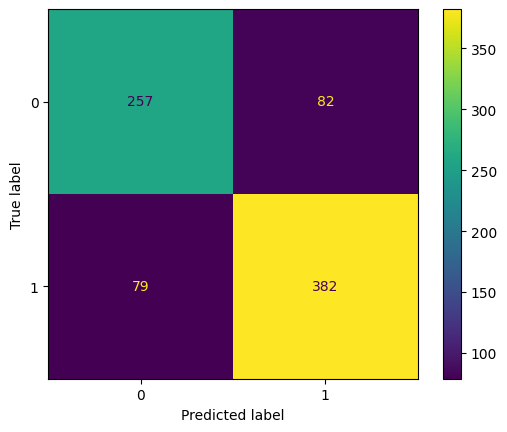

In [22]:
# Generate predictions with the best model
y_pred = best_rf.predict(valid_dataset.X)

# Create the confusion matrix
cm = confusion_matrix(valid_dataset.y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [23]:
from sklearn.metrics import f1_score

y_pred = best_rf.predict(valid_dataset.X)

accuracy = accuracy_score(valid_dataset.y, y_pred)
precision = precision_score(valid_dataset.y, y_pred)
recall = recall_score(valid_dataset.y, y_pred)

precision_s = precision_score(valid_dataset.y, y_pred,average='micro')
recall_s    = recall_score(valid_dataset.y, y_pred, average='micro')

print("Accuracy     : ", accuracy)
print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy     :  0.79875
Precision    :  0.8232758620689655
Recall       :  0.8286334056399133
F1_score     :  0.79875


In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(train_dataset.X, train_dataset.y)
y_pred = best_rf.predict(valid_dataset.X)
print("Accuracy score: " + str(accuracy_score(valid_dataset.y, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(valid_dataset.y, y_pred)))
print("\nClassification report: \n" + str(classification_report(valid_dataset.y, y_pred)))

Accuracy score: 0.79875

Confusion matrix: 
[[257  82]
 [ 79 382]]

Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       339
           1       0.82      0.83      0.83       461

    accuracy                           0.80       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.80      0.80      0.80       800



[Text(0.5, 0.875, 'x[939] <= 0.5\nentropy = 0.988\nsamples = 3199\nvalue = [1396, 1803]'),
 Text(0.25, 0.625, 'x[831] <= 0.5\nentropy = 1.0\nsamples = 2634\nvalue = [1304, 1330]'),
 Text(0.125, 0.375, 'x[725] <= 0.5\nentropy = 0.985\nsamples = 2020\nvalue = [1155, 865]'),
 Text(0.0625, 0.125, 'entropy = 0.966\nsamples = 1840\nvalue = [1120, 720]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 180\nvalue = [35, 145]'),
 Text(0.375, 0.375, 'x[333] <= 0.5\nentropy = 0.799\nsamples = 614\nvalue = [149, 465]'),
 Text(0.3125, 0.125, 'entropy = 0.961\nsamples = 289\nvalue = [111, 178]'),
 Text(0.4375, 0.125, 'entropy = 0.52\nsamples = 325\nvalue = [38, 287]'),
 Text(0.75, 0.625, 'x[171] <= 0.5\nentropy = 0.641\nsamples = 565\nvalue = [92, 473]'),
 Text(0.625, 0.375, 'x[401] <= 0.5\nentropy = 0.993\nsamples = 60\nvalue = [27, 33]'),
 Text(0.5625, 0.125, 'entropy = 1.0\nsamples = 54\nvalue = [27, 27]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.875, 0.375, 

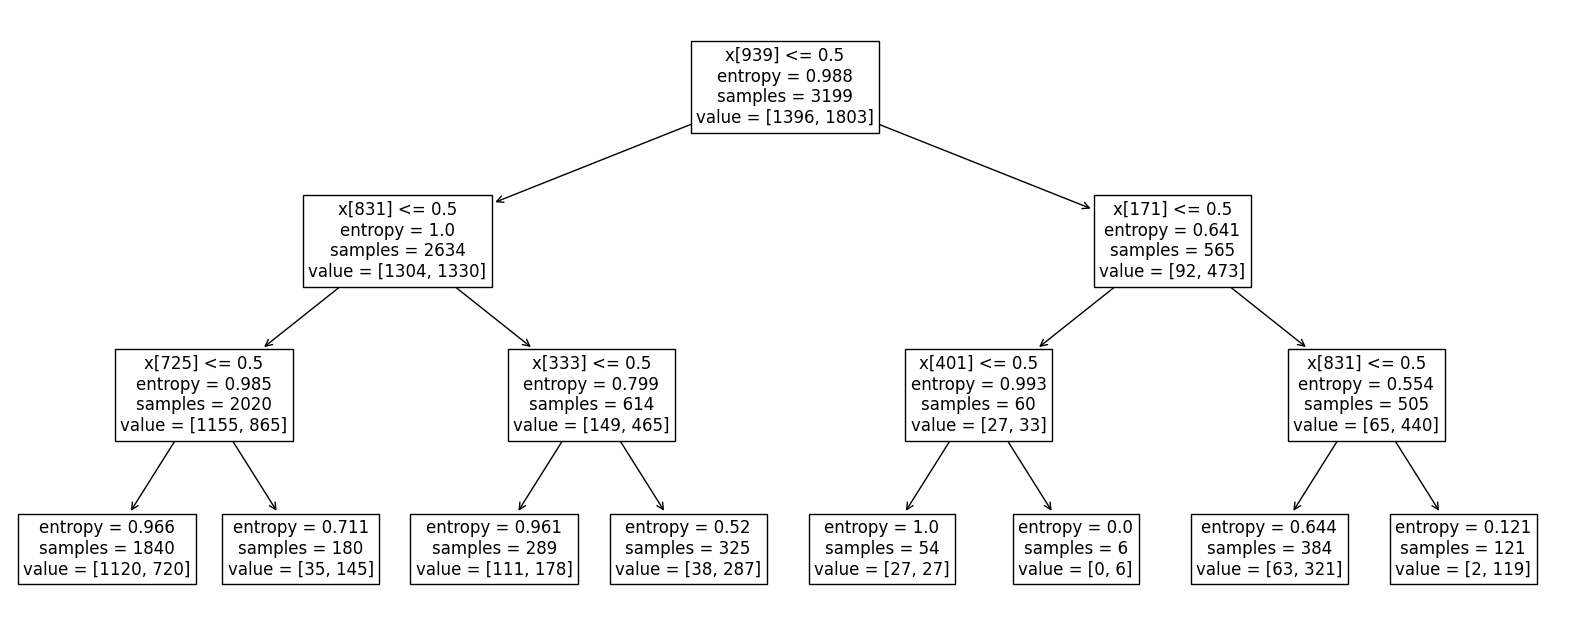

In [25]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…

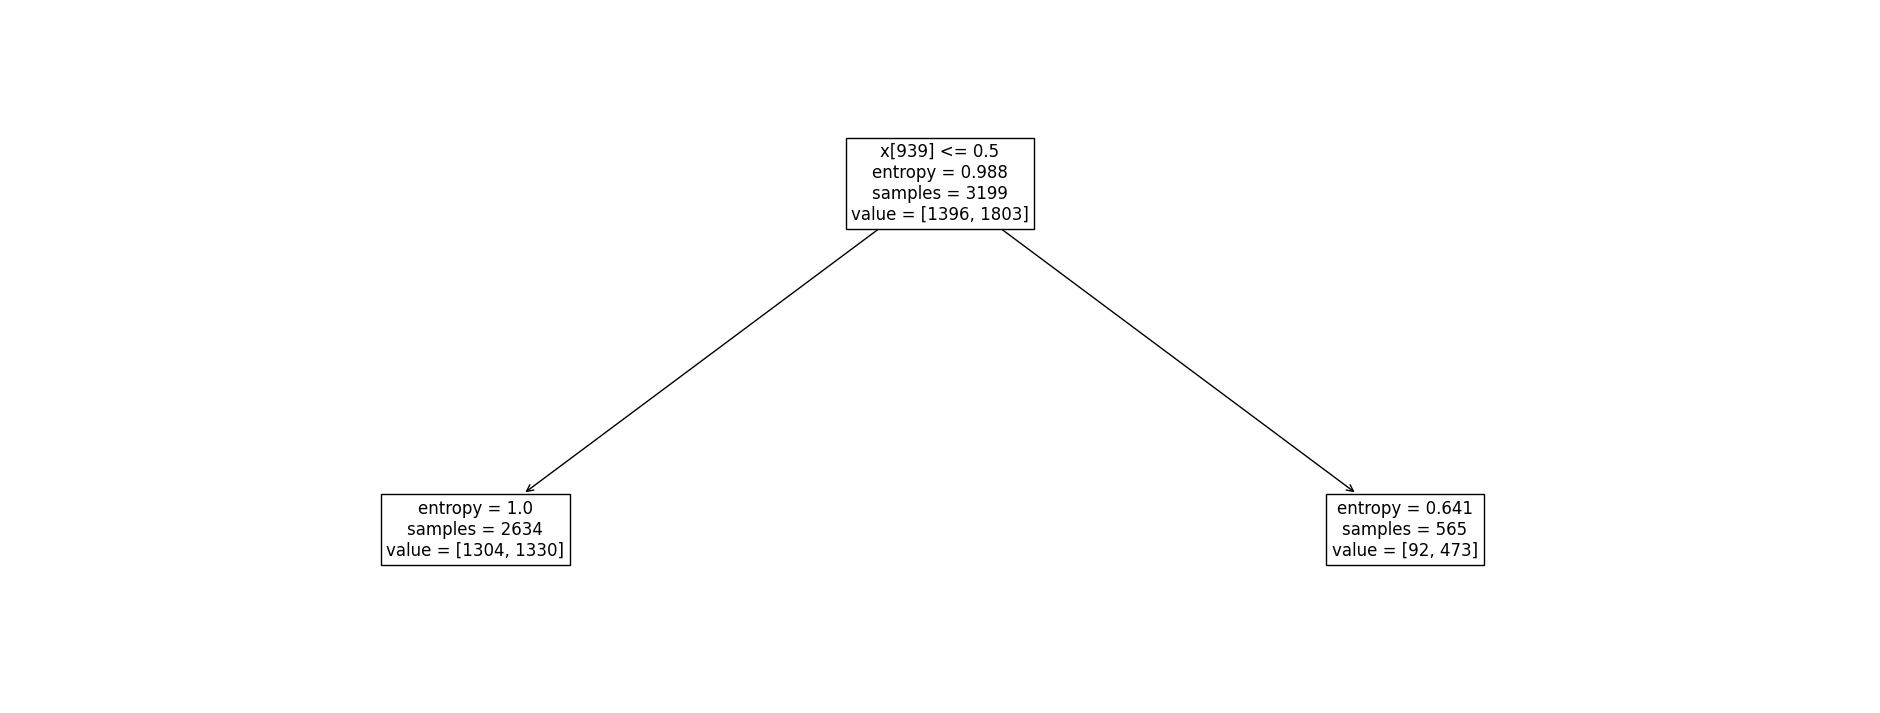

In [26]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(train_dataset.X, train_dataset.y)
  y_pred = best_rf.predict(valid_dataset.X)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact

The p value, or probability value, is a statistical measurement used to validate a hypothesis against observed data. It tells you how likely it is that your data could have occurred under the null hypothesis. The level of statistical significance is often expressed as a p-value between 0 and 1. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

In [27]:
from scipy.stats import hypergeom

table = cm
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
fisher = pd.DataFrame(hypergeom.pmf(np.arange(start, end+1), M, n, N), columns=['p-value'])
fisher

,p-value
0,6.451483e-120
1,5.832141e-117
2,2.599895e-114
3,7.620806e-112
4,1.652474e-109
...,...
332,2.737038e-212
333,5.024920e-216
334,5.899871e-220
335,3.828599e-224


In [28]:
from scipy.stats import fisher_exact
pvalue = fisher_exact(table, alternative='two-sided')
pvalue[1]

6.231910075091197e-65

##Explaining model (LIME)

In [29]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=7eba53840f850226fe410f724c892cf49ea4a4659694df4fbce09c1fd129620a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [30]:
from lime import lime_tabular
feature_names = ["fp_%s"  % x for x in range(n_features)]
explainer = lime_tabular.LimeTabularExplainer(train_dataset.X,
                                              feature_names=feature_names,
                                              categorical_features=feature_names,
                                              class_names=['np', 'p'],
                                              discretize_continuous=True)

In [31]:
#FUNÇÕES
# We need a function which takes a 2d numpy array (samples, features) and returns predictions (samples,)

def eval_model(my_model,i):
    def eval_closure(x):
        ds = dc.data.NumpyDataset(x, n_tasks=n_tasks)
        # The 0th task is NR-AR
        predictions = my_model.predict(ds)[:,i]
        return predictions
    return eval_closure

##################################
def fp_mol(mol, fp_length=n_features):
    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of SMILES strings that activated that fingerprint
    """
    d = {}
    feat = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=n_features)
    retval = feat._featurize(mol)
    for k, v in retval.items():
        index = k % fp_length
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d
#######################
def verifTox(l):
  somaTox = 0.0
  somaNao = 0.0

  for peso in l:
      if peso > 0:
        somaTox += peso
      else:
        somaNao += peso
  if abs(somaTox) > abs(somaNao):
    return ("YES",somaTox,somaNao)
  else:
    return ("NO",somaTox,somaNao)
#########################

In [32]:
print(best_rf.predict_proba(valid_dataset.X)[:,1])

[0.49371564 0.42837725 0.40868649 0.27990817 0.51020813 0.93800494
 0.77688432 0.70926163 0.83121329 0.30191211 0.63164922 0.41453684
 0.79740766 0.36673859 0.84398411 0.5031622  0.71957707 0.90039747
 0.93255394 0.9497504  0.51289661 0.42373102 0.26158118 0.9174488
 0.67975241 0.87152085 0.76227654 0.86316575 0.16992065 0.91618814
 0.57191015 0.47557599 0.56284301 0.55061939 0.2910418  0.62900374
 0.86808837 0.41744509 0.28991043 0.46123049 0.67364078 0.8253119
 0.27630961 0.33826634 0.31229814 0.42804841 0.45693982 0.28625949
 0.55425631 0.72317165 0.34111112 0.40256258 0.30936151 0.84541556
 0.4269889  0.47978386 0.53283671 0.61922911 0.59524096 0.32933387
 0.28763925 0.59956548 0.79240524 0.86793804 0.39733391 0.91546887
 0.32317354 0.13074483 0.38848662 0.46675264 0.69184744 0.92148016
 0.84664421 0.51344629 0.76807118 0.72610766 0.27186196 0.52713697
 0.89645564 0.59900265 0.89562233 0.44457928 0.1729899  0.61037467
 0.51651773 0.30228366 0.10965227 0.54646695 0.29461123 0.495597

In [33]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

for i in range(n_tasks):
    #model_fn = eval_model(best_rf,i)
    model_fn = lambda x: best_rf.predict_proba(x).astype(float)
    lista_active_id = np.where((valid_dataset.y[:,i] == 1) * (best_rf.predict_proba(valid_dataset.X)[:,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Penetrate","Non-Penetrate"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(valid_dataset.X[active_id], model_fn , num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(valid_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = valid_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)
      #dfAllMolTox = pd.concat([dfAllMolTox, dfMolTox])

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          #tol = st.mean(lista_pesos) #weight's mean
          tol = 0.0
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<=tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)
          #dfAllFragMolPeso = pd.concat([dfAllFragMolPeso, dfFragMolPeso])


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')




TASK: 0

check 5


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 14


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 18


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 19


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 23


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 25


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 27


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 29


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 36


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 41


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 53


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 63


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 65


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 71


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 72


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 78


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 80


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 93


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 95


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 96


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 100


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 108


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 110


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 111


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 112


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 113


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 115


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 126


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 138


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 148


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 160


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 163


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 165


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 175


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 177


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 179


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 181


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 184


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 187


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 189


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 191


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 194


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 196


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 201


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 204


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 206


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 210


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 211


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 215


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 218


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 221


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 222


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 228


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 229


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 230


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 232


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 235


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 236


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 239


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 243


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 244


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 248


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 249


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 250


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 253


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 254


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 256


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 262


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 263


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 272


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 274


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 276


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 278


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 279


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 280


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 283


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 288


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 307


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 315


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 316


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 318


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 319


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 328


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 330


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 332


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 336


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 343


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 349


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 353


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 354


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 356


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 359


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 361


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 367


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 371


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 375


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 378


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 379


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 384


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 387


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 400


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 407


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 412


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 416


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 419


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 422


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 424


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 429


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 430


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 433


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 436


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 439


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 442


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 446


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 451


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 457


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 461


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 465


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 468


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 472


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 478


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 484


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 500


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 501


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 505


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 508


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 515


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 517


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 519


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 524


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 525


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 531


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 532


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 533


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 534


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 535


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 538


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 539


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 543


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 547


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 552


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 558


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 563


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 564


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 571


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 572


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 578


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 584


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 589


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 591


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 592


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 594


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 596


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 597


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 599


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 601


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 605


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 607


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 612


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 623


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 635


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 636


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 637


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 645


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 651


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 653


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 661


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 662


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 663


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 664


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 671


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 672


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 676


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 688


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 693


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 694


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 697


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 699


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 707


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 710


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 711


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 722


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 724


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 725


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 726


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 730


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 742


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 743


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 744


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 756


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 757


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 759


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 765


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 766


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 767


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 775


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 779


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 782


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 786


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 787


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 794


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 796


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
print(lista_active_id)

[  5  14  18  19  23  25  27  29  36  41  53  63  65  71  72  78  80  93
  95  96 100 108 110 111 112 113 115 126 138 148 160 163 165 175 177 179
 181 184 187 189 191 194 196 201 204 206 210 211 215 218 221 222 228 229
 230 232 235 236 239 243 244 248 249 250 253 254 256 262 263 272 274 276
 278 279 280 283 288 307 315 316 318 319 328 330 332 336 343 349 353 354
 356 359 361 367 371 375 378 379 384 387 400 407 412 416 419 422 424 429
 430 433 436 439 442 446 451 457 461 465 468 472 478 484 500 501 505 508
 515 517 519 524 525 531 532 533 534 535 538 539 543 547 552 558 563 564
 571 572 578 584 589 591 592 594 596 597 599 601 605 607 612 623 635 636
 637 645 651 653 661 662 663 664 671 672 676 688 693 694 697 699 707 710
 711 722 724 725 726 730 742 743 744 756 757 759 765 766 767 775 779 782
 786 787 794 796]


In [35]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

In [36]:
#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

In [37]:
#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic


In [38]:
def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

In [39]:
"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = pd.concat([dftop10Tasks, d.head(10)])
  dfAllTasksInfo = pd.concat([dfAllTasksInfo, d])



[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] non-ring atom 0 marked aromatic
[01:54:55] 

##Highlights of top10

In [40]:
#Highlight of the top10 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = valid_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-40-456ecc0551b2>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [41]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights

In [42]:
valid_dataset.to_dataframe()['ids'].to_excel('valid_dataset_molecules.xlsx')
files.download('valid_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Exporting Data

In [43]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 1.7 MB/s eta 0:00:00


In [44]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES em Tasks.xlsx')
files.download('Contribuição SMILES em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10.xlsx')
files.download('Highlights Top 10.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

Quantity  \
Task Fragment SMILES             
0    [N+]=O                100   
     [N+][O-]              100   
     N=O                     7   
     CCl                    10   
     CCO                     6   
     CC1CO1                  5   
     CC(C)O                  5   
     COC                     6   
     NN=O                    5   
     CN(N)C(N)=O             1   

                                                                 ROMol  \
Task Fragment SMILES                                                     
0    [N+]=O           <rdkit.Chem.rdchem.Mol object at 0x7c914fea36f0>   
     [N+][O-]         <rdkit.Chem.rdchem.Mol object at 0x7c914fea37d0>   
     N=O              <rdkit.Chem.rdchem.Mol object at 0x7c914fea2dc0>   
     CCl              <rdkit.Chem.rdchem.Mol object at 0x7c914fea2ea0>   
     CCO              <rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>   
     CC1CO1           <rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>   
     CC(C)O           <rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>   
     COC              <rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>   
     NN=O             <rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>   
     CN(N)C(N)=O      <rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>   

                      Total Weight  \
Task Fragment SMILES                 
0    [N+]=O               3.559969   
     [N+][O-]             1.833400   
     N=O                  0.316769   
     CCl                  0.300206   
     CCO                  0.241923   
     CC1CO1               0.159902   
     CC(C)O               0.157891   
     COC                  0.150465   
     NN=O                 0.083653   
     CN(N)C(N)=O          0.032620   

                                                       Active Molecules  \
Task Fragment SMILES                                                      
0    [N+]=O           [5, 14, 19, 23, 65, 72, 80, 96, 110, 111, 112,...   
     [N+][O-]         [5, 14, 19, 23, 65, 72, 80, 96, 110, 111, 112,...   
     N=O                            [175, 228, 249, 356, 515, 596, 697]   
     CCl              [148, 165, 179, 249, 319, 422, 515, 558, 757, ...   
     CCO                                  [27, 505, 538, 558, 693, 699]   
     CC1CO1                                    [27, 505, 538, 558, 693]   
     CC(C)O                                    [27, 505, 538, 558, 693]   
     COC                                  [27, 505, 538, 558, 693, 699]   
     NN=O                                     [175, 249, 356, 515, 596]   
     CN(N)C(N)=O                                                  [228]   

                                       Highlight First Active Molecule  
Task Fragment SMILES                                                    
0    [N+]=O           <rdkit.Chem.rdchem.Mol object at 0x7c914fea2110>  
     [N+][O-]         <rdkit.Chem.rdchem.Mol object at 0x7c914fea2030>  
     N=O              <rdkit.Chem.rdchem.Mol object at 0x7c914fea20a0>  
     CCl              <rdkit.Chem.rdchem.Mol object at 0x7c914fea1fc0>  
     CCO              <rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>  
     CC1CO1           <rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>  
     CC(C)O           <rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>  
     COC              <rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>  
     NN=O             <rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>  
     CN(N)C(N)=O      <rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>

In [46]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,[N+]=O,100,<rdkit.Chem.rdchem.Mol object at 0x7c914fea36f0>,3.559969,"[5, 14, 19, 23, 65, 72, 80, 96, 110, 111, 112,...",<rdkit.Chem.rdchem.Mol object at 0x7c914fea2110>,2
1,0,[N+][O-],100,<rdkit.Chem.rdchem.Mol object at 0x7c914fea37d0>,1.833400,"[5, 14, 19, 23, 65, 72, 80, 96, 110, 111, 112,...",<rdkit.Chem.rdchem.Mol object at 0x7c914fea2030>,2
2,0,N=O,7,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2dc0>,0.316769,"[175, 228, 249, 356, 515, 596, 697]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea20a0>,2
3,0,CCl,10,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ea0>,0.300206,"[148, 165, 179, 249, 319, 422, 515, 558, 757, ...",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1fc0>,2
4,0,CCO,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>,0.241923,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>,3
5,0,CC1CO1,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>,0.159902,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>,4
6,0,CC(C)O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>,0.157891,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>,4
7,0,COC,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>,0.150465,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>,3
8,0,NN=O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>,0.083653,"[175, 249, 356, 515, 596]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>,3
9,0,CN(N)C(N)=O,1,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>,0.032620,[228],<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>,6


In [47]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CN(N)C(N)=O,1,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>,0.032620,[228],<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>,6
5,0,CC1CO1,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>,0.159902,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>,4
6,0,CC(C)O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>,0.157891,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>,4
4,0,CCO,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>,0.241923,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>,3
7,0,COC,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>,0.150465,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>,3
8,0,NN=O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>,0.083653,"[175, 249, 356, 515, 596]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>,3
0,0,[N+]=O,100,<rdkit.Chem.rdchem.Mol object at 0x7c914fea36f0>,3.559969,"[5, 14, 19, 23, 65, 72, 80, 96, 110, 111, 112,...",<rdkit.Chem.rdchem.Mol object at 0x7c914fea2110>,2
1,0,[N+][O-],100,<rdkit.Chem.rdchem.Mol object at 0x7c914fea37d0>,1.833400,"[5, 14, 19, 23, 65, 72, 80, 96, 110, 111, 112,...",<rdkit.Chem.rdchem.Mol object at 0x7c914fea2030>,2
2,0,N=O,7,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2dc0>,0.316769,"[175, 228, 249, 356, 515, 596, 697]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea20a0>,2
3,0,CCl,10,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ea0>,0.300206,"[148, 165, 179, 249, 319, 422, 515, 558, 757, ...",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1fc0>,2


In [48]:
dftop10Tasks.shape

(10, 8)

In [49]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CN(N)C(N)=O,1,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>,0.032620,[228],<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>,6
5,0,CC1CO1,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>,0.159902,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>,4
6,0,CC(C)O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>,0.157891,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>,4
4,0,CCO,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>,0.241923,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>,3
7,0,COC,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>,0.150465,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>,3
8,0,NN=O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>,0.083653,"[175, 249, 356, 515, 596]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>,3


In [50]:
dftop10Tasks.shape

(6, 8)

In [51]:
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CN(N)C(N)=O,1,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>,0.032620,[228],<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>,6
5,0,CC1CO1,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>,0.159902,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>,4
6,0,CC(C)O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>,0.157891,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>,4
4,0,CCO,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>,0.241923,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>,3
7,0,COC,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>,0.150465,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>,3
8,0,NN=O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>,0.083653,"[175, 249, 356, 515, 596]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>,3


In [52]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CN(N)C(N)=O,1,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>,0.032620,[228],<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>,6
5,0,CC1CO1,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>,0.159902,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>,4
6,0,CC(C)O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>,0.157891,"[27, 505, 538, 558, 693]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>,4
4,0,CCO,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>,0.241923,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>,3
7,0,COC,6,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>,0.150465,"[27, 505, 538, 558, 693, 699]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>,3
8,0,NN=O,5,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>,0.083653,"[175, 249, 356, 515, 596]",<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>,3


In [53]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
9,0,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2ce0>,<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d20>
5,0,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2f80>,<rdkit.Chem.rdchem.Mol object at 0x7c914fea1ee0>
6,0,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3610>,<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e70>
4,0,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3680>,<rdkit.Chem.rdchem.Mol object at 0x7c914fea1f50>
7,0,<rdkit.Chem.rdchem.Mol object at 0x7c914fea3060>,<rdkit.Chem.rdchem.Mol object at 0x7c914fea1e00>
8,0,<rdkit.Chem.rdchem.Mol object at 0x7c914fea2e30>,<rdkit.Chem.rdchem.Mol object at 0x7c914fea1d90>


In [54]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()